<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge (Part 1)

## Problem Statement

This project aims to explore the top predictors of selling price of a given home in Ames, Iowa.

### Contents:
- Background
- Outside Research
- Data Overview
- EDA and Cleaning
- Exploratory Data Analysis
- Summary Table on the features I keep

## Background

As a data analyst working under a real estate company, I am tasked to develop a model to predict the selling price of a given home in Ames, Iowa. My employer hopes to use this information to further educate the property agents on how to utilise these information to upsell a house in Ames. The agents can also use this information to advice their sellers on a reasonable price to sell their house in Ames.

## Outside Research

Based on a post on the 'ByCarrier' blog, we can understand more on the most common features of a 'Perfect' house. Some of the features are outdoor areas and garage. To have such features, the house would need to have big spaces. We must also consider how functional is our 'Dream' house. Is it able to address our current needs, will it be able to address our future needs? We have to be more practical when buying a house. One can understand more from the blogpost ([*source*](https://bycarrier.com/blog/custom-homes/features-perfect-house/)).

## Data Overview

The Ames housing train data set contains 2051 entries with 81 features, representing characteristics of houses sold between 2006 - 2010. 

The features can also be classified into the following types:

- Numerical (Example: General Living Area)
- Categorical (Example: Neighborhood)

## Libraries & Data Importing

In [1]:
#Import pandas, numpy, matplotlib.pyplot and seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the 'train.csv' and 'test.csv' datasets to clean and understand them

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## EDA & Cleaning

In [3]:
#To see how huge is the 'train.csv' dataset

train.shape

(2051, 81)

In [4]:
#To see how huge is the 'test.csv' dataset
#'test.csv' is 1 column lesser as 'SalePrice' is the column we want to predict

test.shape

(878, 80)

In [5]:
#Checking columns and data types

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#Checking which are the top 20 columns with the highest number of missing value

train.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
dtype: int64

Checking the top columns (with missing values) with the data dictionary to further understand each column. Once we understand how relevant is the feature related to the 'SalePrice', we can decide to drop or keep the column.

In [7]:
#Checking to see is 'train.csv' and 'test.csv' have the same columns before I drop any columns
#As mentioned above, train has 1 more column (which is the variable we want to predict)
#Hence, 80 common column means they have the same columns in both dataset

a = train.columns.intersection(test.columns)
print ("Common Columns:",len(a))

Common Columns: 80


In [8]:
#Dropping columns: 'ID', 'PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence' and 'Fireplace Qu'

train.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
test.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

Dropping 'PID' as they do not affect the Sales Price.

Dropping 'PoolQC', 'Misc Feature', 'Alley', 'Fence' and 'Fireplace Qu'. Missing values for these features indicate that most houses does not come with these features. The number of missing values are all 1000 or more, which means that more than 49% of the houses in the train.csv does not contain these features. Therefore, these features are not helpful in predicting our Sales Price as the relevance is very low.

In [9]:
#Checking that we dropped 6 columns from 'train.csv'

train.shape

(2051, 75)

In [10]:
#Checking that we dropped 6 columns from 'test.csv'

test.shape

(878, 74)

In [11]:
#Defines a function to create a scatterplot between two variables
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.regplot(x=train[column1],y=train[column2], data=train[column1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

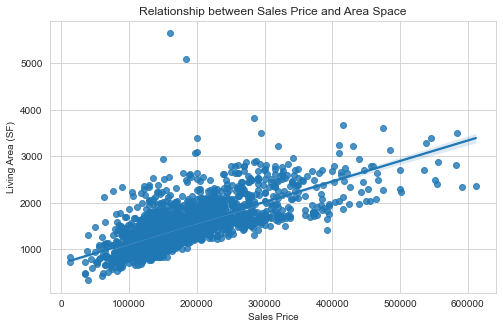

In [12]:
#Scatterplot to compare 'SalePrice' and 'Gr Liv Area'

subplot_scatterplot('SalePrice','Gr Liv Area','Sales Price',
                    'Living Area (SF)',
                    'Relationship between Sales Price and Area Space')

As seen from the scatterplot, there is 2 outliers. Will be dropping these 2 outliers from train.csv.

In [13]:
#Identitfying the houses with more than 4000 square feet (outliers)

train[(train['Gr Liv Area'] > 4000)][['Gr Liv Area']]

,Gr Liv Area
960,5642
1885,5095


In [14]:
#Dropping rows: dropping houses with more than 4000 square feet (outliers)

train.drop([960, 1885], axis=0, inplace=True)

In [15]:
train.shape

(2049, 75)

In [16]:
#Resetting the index
train.reset_index(inplace = True)

In [17]:
# Dropping the old index
train.drop(['index'], axis=1, inplace=True)

#Checking to see if the correct column (old index) was dropped
train.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


In [18]:
#Filling all missing numerical values with '0' and missing strings with 'NA' for 'train.csv'

train = train.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('Not Applicable'))

In [19]:
#Checking that I have zero missing values for 'train.csv'

train.isnull().sum().sum()

0

In [20]:
#Filling all missing numerical values with '0' and missing strings with 'NA' for 'test.csv'

test = test.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('Not Applicable'))

In [21]:
#Checking that I have zero missing values for 'test.csv'

test.isnull().sum().sum()

0

## Exploratory Visualizations

In [22]:
# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in train.columns if col not in col_numerical]

/var/folders/yz/m088r3hn2gs5k6lxmcvz8z440000gn/T/ipykernel_79607/3139167710.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_numerical = [col for col in train.columns if train[col].dtype != np.object]


In [23]:
# Let's find the top 10 columns that are most highly correlated with price
train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:11]

,SalePrice
Overall Qual,0.803462
Gr Liv Area,0.719463
Total Bsmt SF,0.665116
Garage Area,0.655097
1st Flr SF,0.648252
Garage Cars,0.648227
Year Built,0.572405
Year Remod/Add,0.550872
Full Bath,0.538225
Mas Vnr Area,0.511273


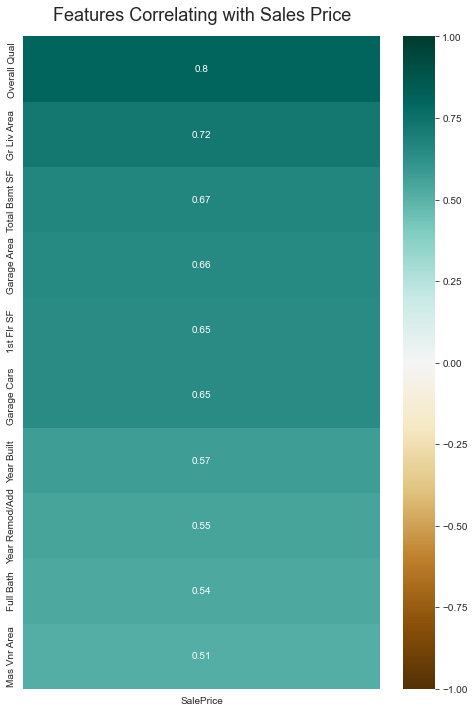

In [24]:
#For continuous features, use heatmap to see the top 10 features related to 'SalePrice'

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:11],
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [25]:
#Scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe['SalePrice'], x=dataframe[column],ax=ax[i], \
                    scatter_kws={'facecolors':'purple','edgecolor':'purple'},
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

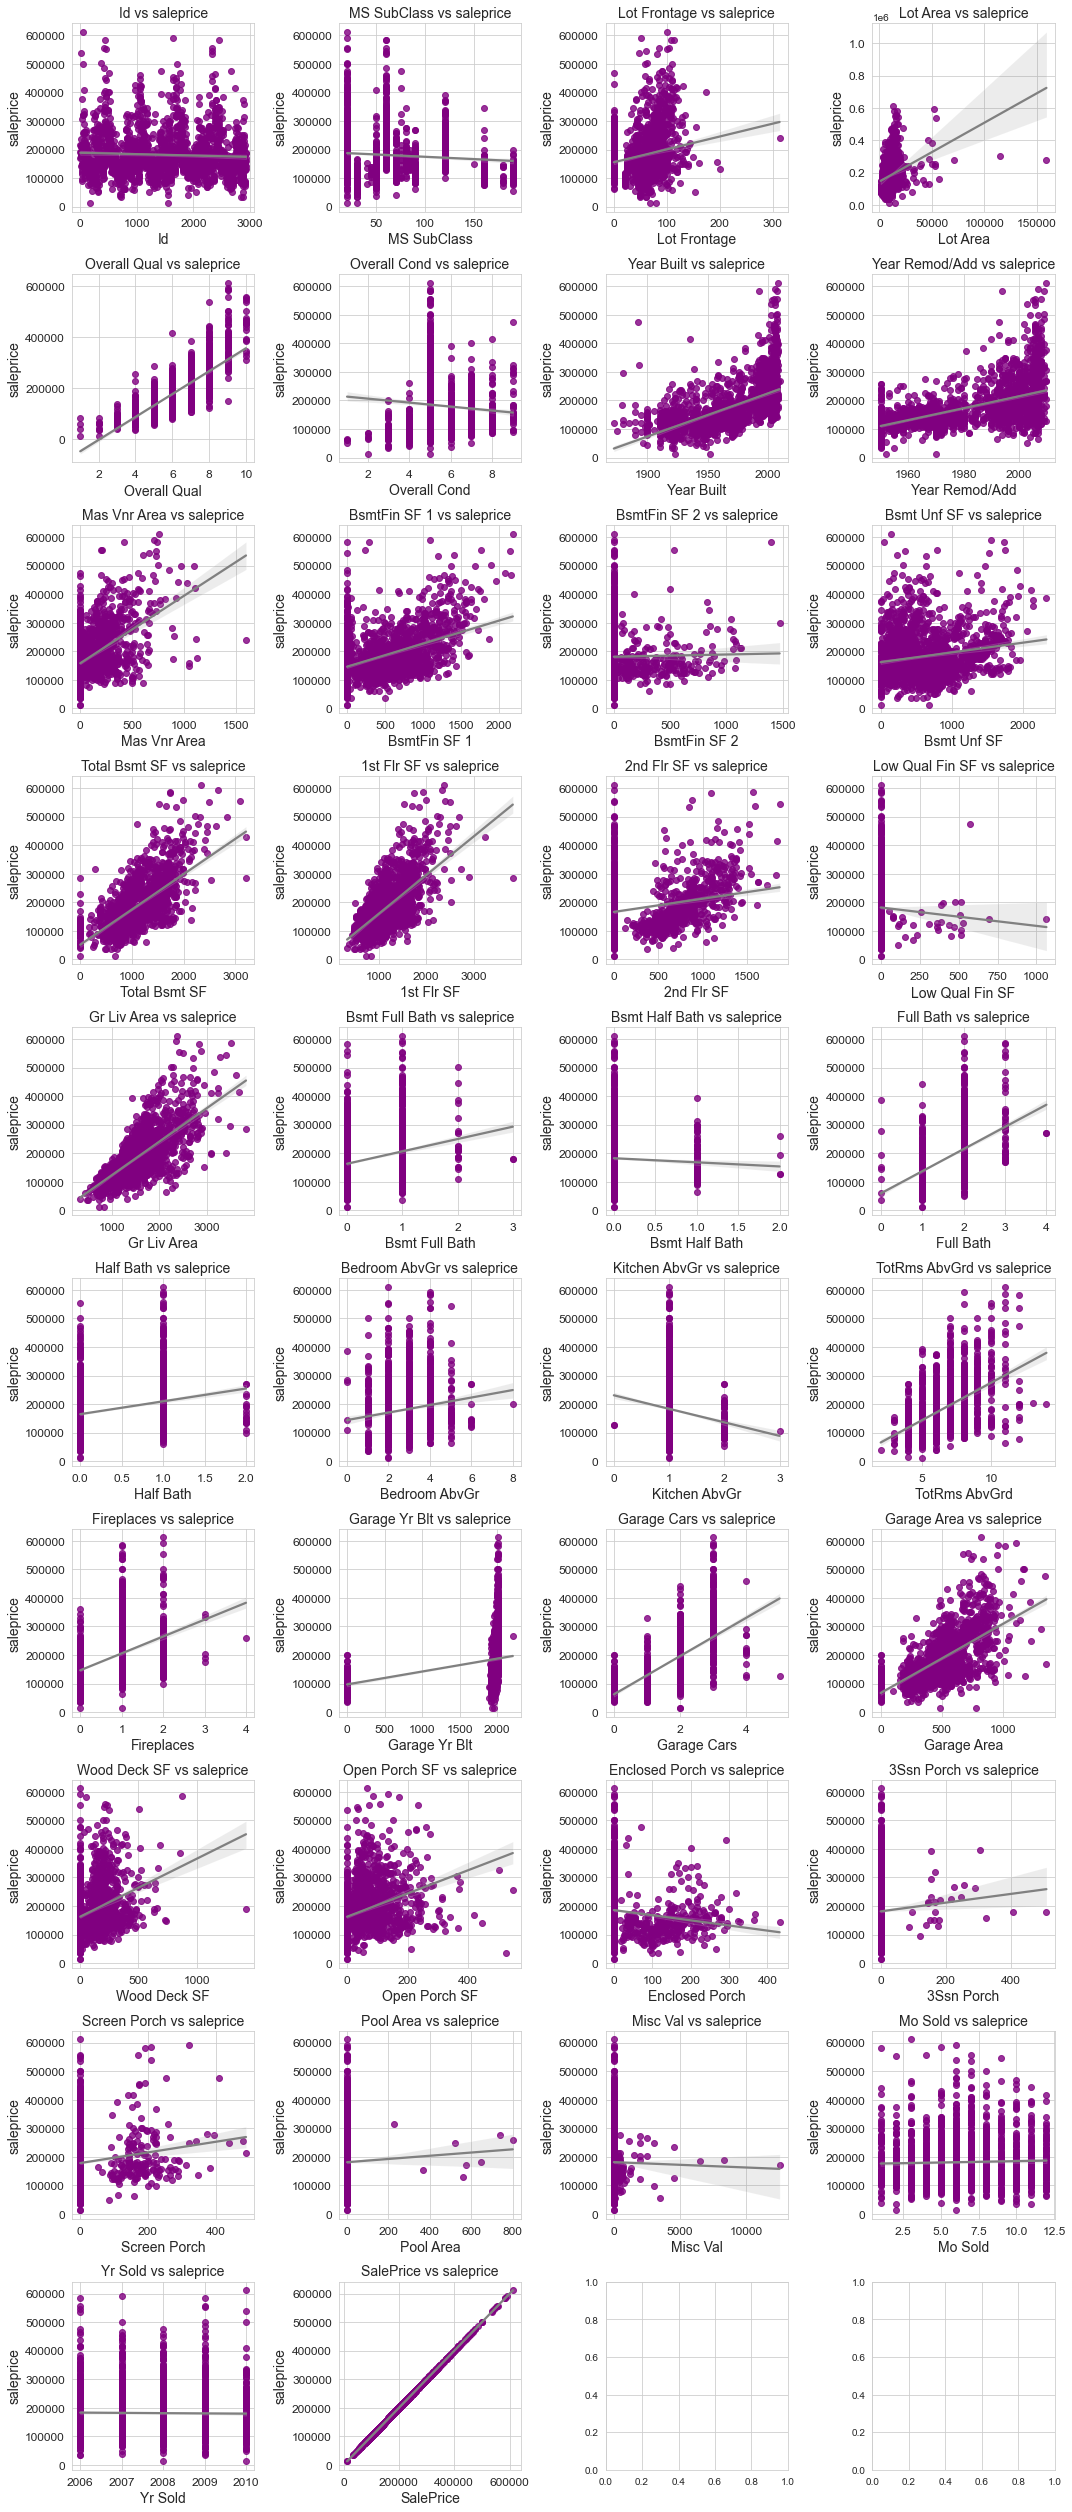

In [26]:
#Scatterplot for all numerical columns

subplot_scatter(train,col_numerical)

As seen above, for numerical features, most of them have a positive relationship with 'SalePrice'. Though there are still some negative relationship like, 'Low Qual Fin SF' and 'Kitchen AbvGr'.

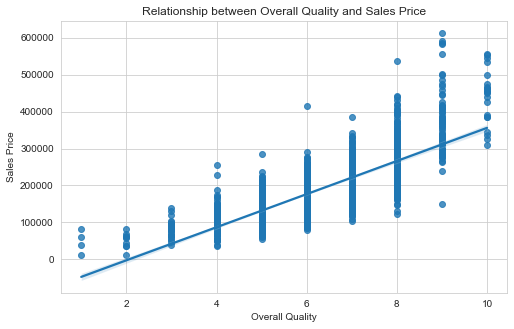

In [27]:
#For continuous features, use scatterplot to further understand the top features with more than 60% relation to 'SalePrice'
#Scatterplot for the feature: 'Overall Qual'

subplot_scatterplot('Overall Qual','SalePrice',
                    'Overall Quality','Sales Price',
                    'Relationship between Overall Quality and Sales Price')

As seen from the correlation heatmap, 'Overall Qual' is at the top with 80% correlation with 'Sales Price'. From the scatterplot above, we can see that 'Overall Quality' has a positive relationship with the 'Sales Price'.

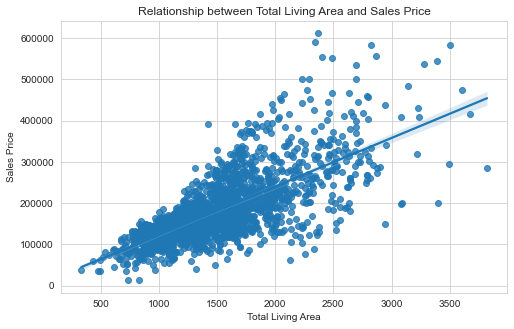

In [28]:
#For continuous features, use scatterplot to further understand the top features with more than 60% relation to 'SalePrice'
#Scatterplot for the feature: 'Gr Liv Area'

subplot_scatterplot('Gr Liv Area','SalePrice',
                    'Total Living Area','Sales Price',
                    'Relationship between Total Living Area and Sales Price')

As seen from the correlation heatmap, 'Gr Liv Area' is the second highest with 72% correlation with 'Sales Price'. From the scatterplot above, we can see that 'Total Living Area' has a positive relationship with the 'Sales Price'.

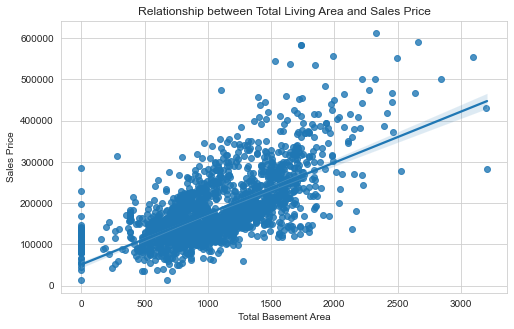

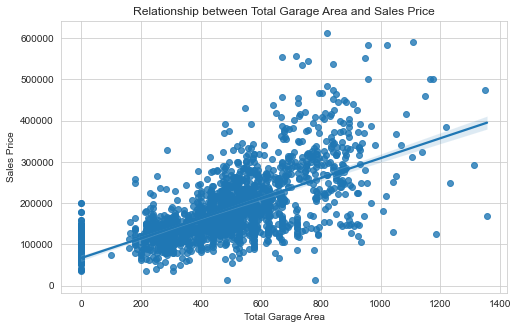

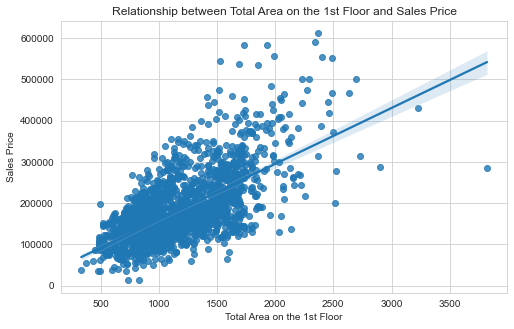

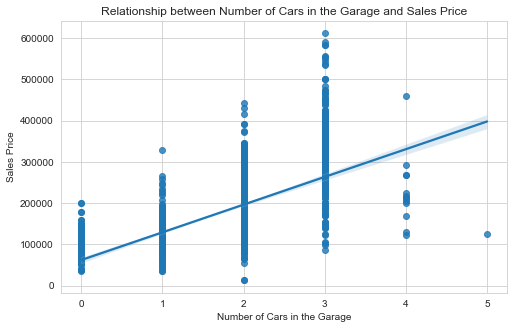

In [29]:
#For continuous features, use scatterplot to further understand the top features with more than 60% relation to 'SalePrice'
#Scatterplot for the feature: 'Total Bsmt SF', 'Garage Area', '1st Flr SF' and 'Garage Cars'

subplot_scatterplot('Total Bsmt SF','SalePrice',
                    'Total Basement Area','Sales Price',
                    'Relationship between Total Living Area and Sales Price')

subplot_scatterplot('Garage Area','SalePrice',
                    'Total Garage Area','Sales Price',
                    'Relationship between Total Garage Area and Sales Price')

subplot_scatterplot('1st Flr SF','SalePrice',
                    'Total Area on the 1st Floor','Sales Price',
                    'Relationship between Total Area on the 1st Floor and Sales Price')

subplot_scatterplot('Garage Cars','SalePrice',
                    'Number of Cars in the Garage','Sales Price',
                    'Relationship between Number of Cars in the Garage and Sales Price')

As seen from the correlation heatmap, 'Total Bsmt SF', 'Garage Area', '1st Flr SF' and 'Garage Cars' has a correlation of 67%-65% with 'Sales Price'. From the scatterplot above, we can see that these features all have a positive relationship with the 'Sales Price'.

In [30]:
#Let's only keep those with more than 60% correlation
#Creating a new variable for the columns I want to drop for numerical features

drop_col_numerical = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 
                      'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
                      'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Wood Deck SF',
                      'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

In [31]:
#Dropping columns: drop_col_numerical

train.drop(drop_col_numerical, axis=1, inplace=True)
test.drop(drop_col_numerical, axis=1, inplace=True)

In [32]:
#Boxplot subplots
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe['SalePrice'], width = 0.3, ax = ax[i], color='purple')
        ax[i].set_title(column,fontsize=12)  
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel(column, fontsize=12)

    plt.tight_layout()

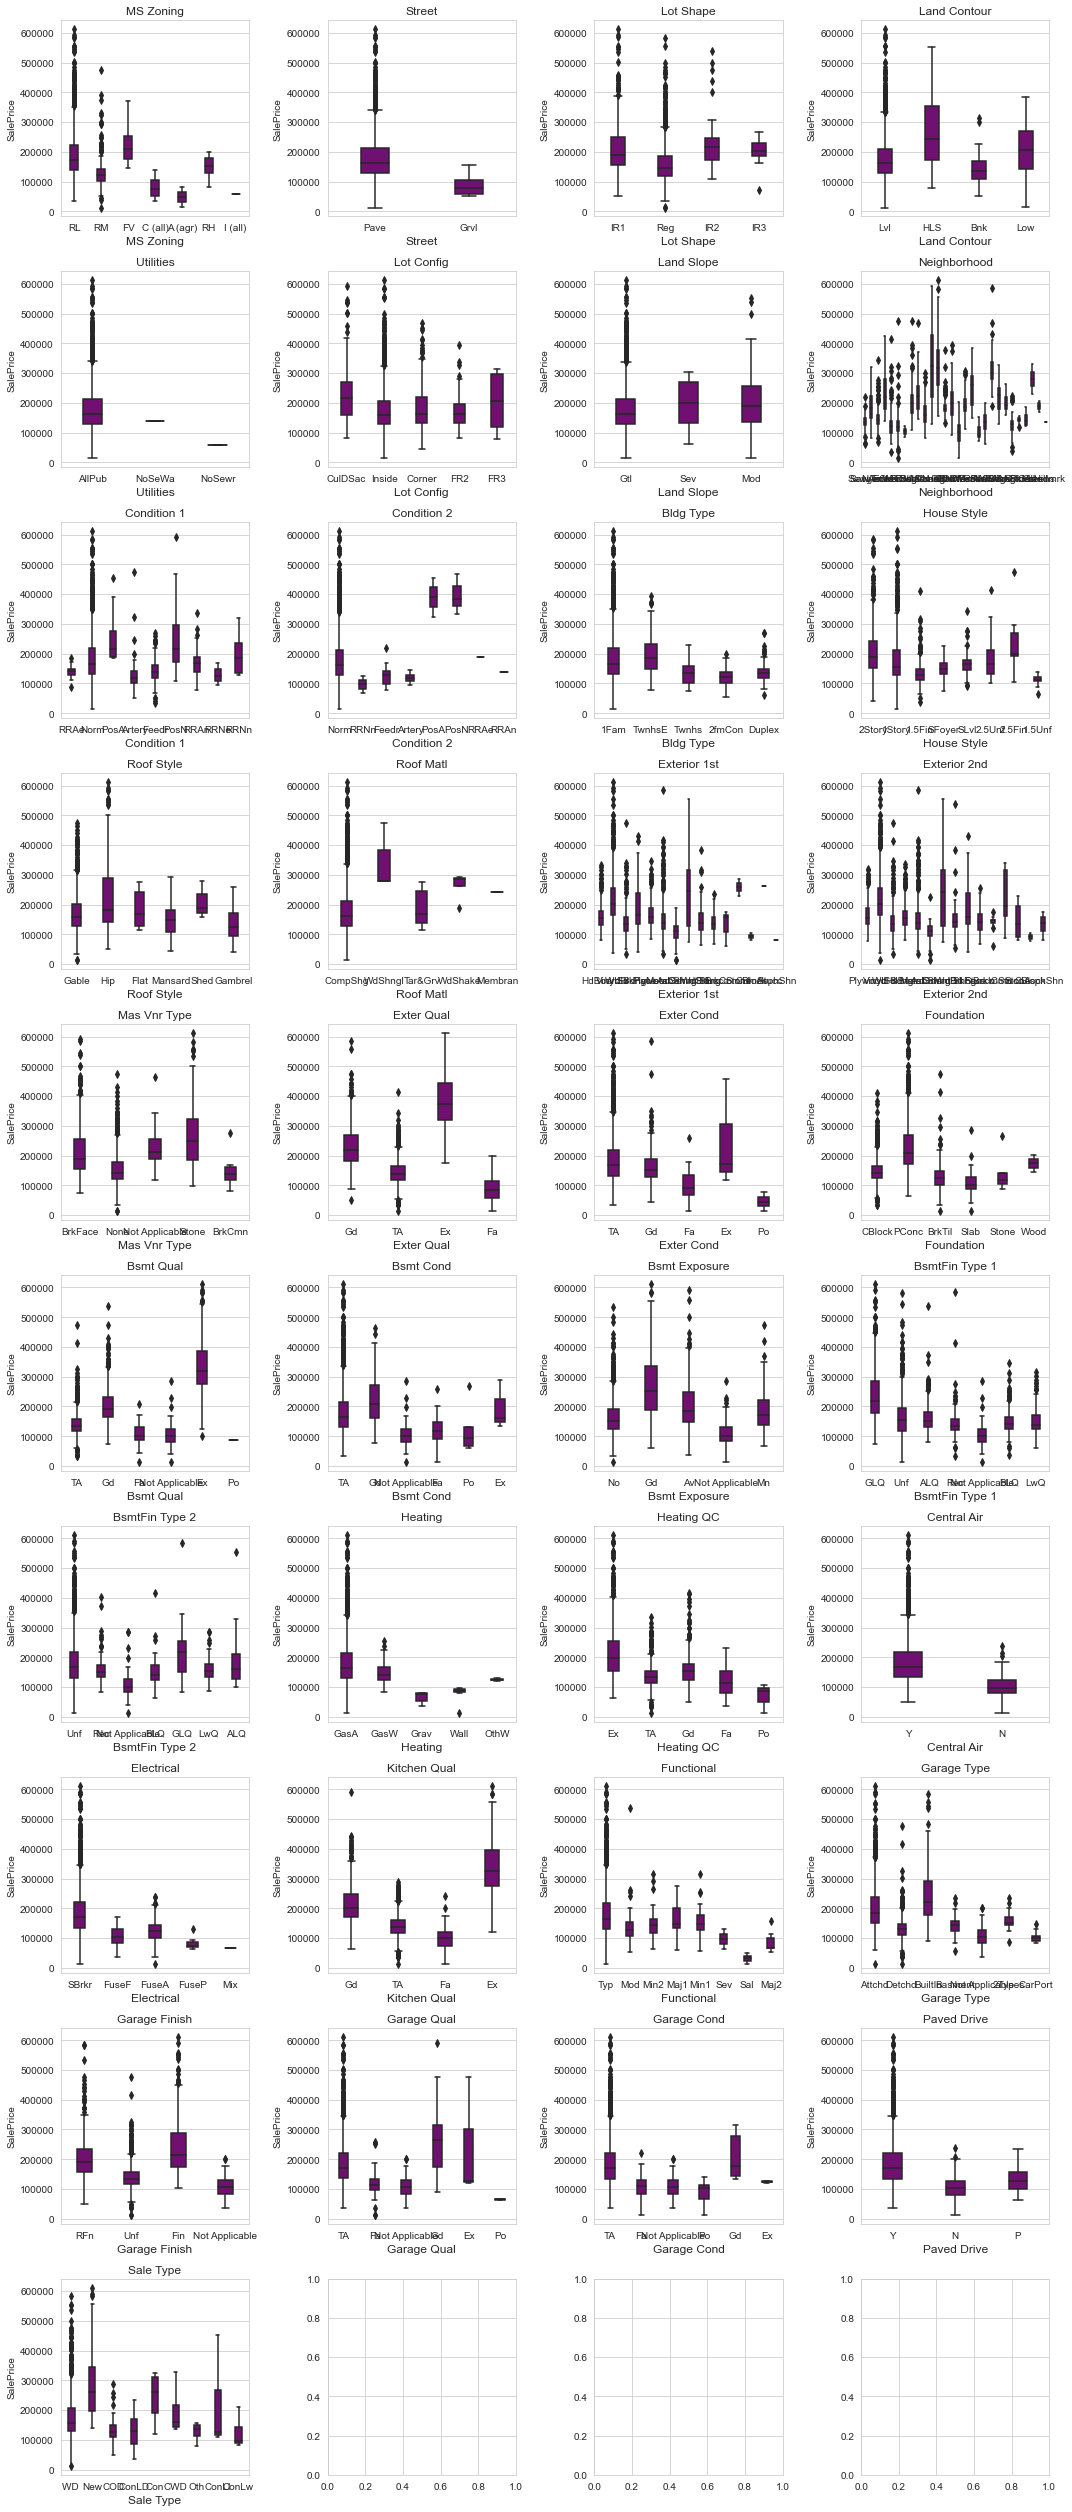

In [33]:
#Boxplot for all categorical columns

subplot_box(train, col_categorical)

As seen above, there are features where their notches in the boxplot do not overlap. This shows that these features are more relevant to 'SalePrice'.

Will further understand these features below using individual boxplot.

In [34]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#The catergories features are: 'Condition 1', 'Condition 2', 'Exter Qual', 'Exter Cond', 'Foundation'
#                              'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Functional', 'Garage Finish'                              

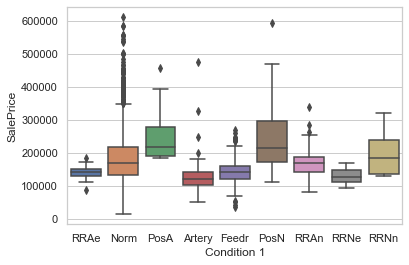

In [35]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Condition 1'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Condition 1', y='SalePrice', data=train)

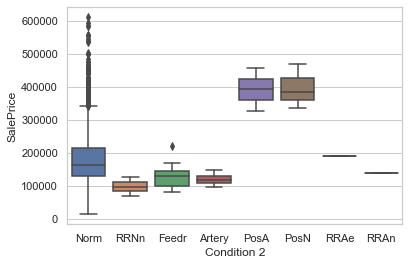

In [36]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Condition 2'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Condition 2', y='SalePrice', data=train)

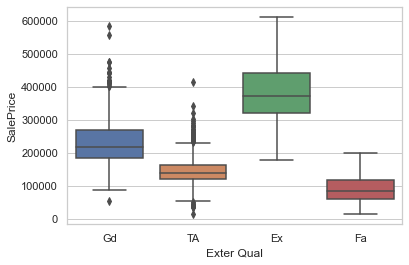

In [37]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Exter Qual'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Exter Qual', y='SalePrice', data=train)

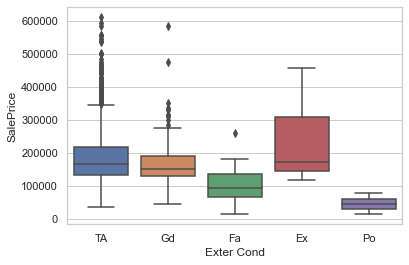

In [38]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Exter Cond'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Exter Cond', y='SalePrice', data=train)

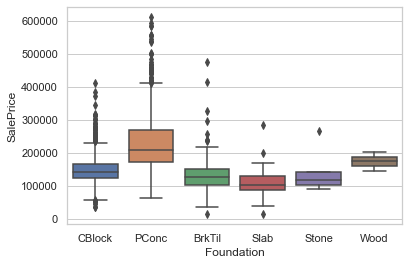

In [39]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Foundation'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Foundation', y='SalePrice', data=train)

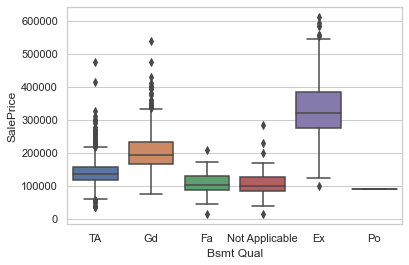

In [40]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Bsmt Qual'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Bsmt Qual', y='SalePrice', data=train)

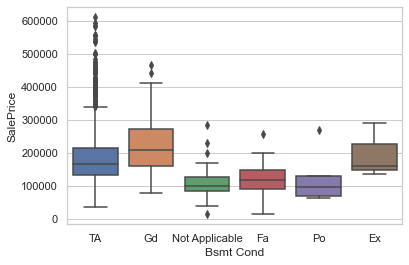

In [41]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Bsmt Cond'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Bsmt Cond', y='SalePrice', data=train)

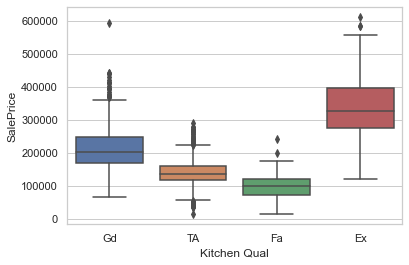

In [42]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Kitchen Qual'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Kitchen Qual', y='SalePrice', data=train)

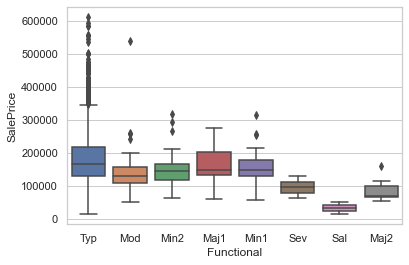

In [43]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Functional'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Functional', y='SalePrice', data=train)

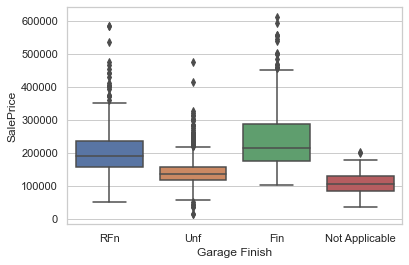

In [44]:
#For catergories features, use individual boxplot to further understand those features where their notches in the boxplot do not overlap
#'Garage Finish'

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Garage Finish', y='SalePrice', data=train)

In [45]:
#Creating a new variable for the columns I want to drop for categorical features
#I can use the same variable for both train and test as their categorical features are the same

drop_col_categorical = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
                        'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Bsmt Exposure', 'BsmtFin Type 1', 
                        'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Garage Type', 
                        'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type']

In [46]:
#Dropping columns: drop_col_categorical

train.drop(drop_col_categorical, axis=1, inplace=True)
test.drop(drop_col_categorical, axis=1, inplace=True)

In [47]:
#Checking the number of columns left for 'train.csv'

train.shape

(2049, 18)

In [48]:
#Checking the number of columns left for 'train.csv'

test.shape

(878, 17)

## Summary table for the features I keep

| **Feature**       | **Type**      | **Reason for keeping feature**              |
|-------------------|---------------|---------------------------------------------|
| **Overall Qual**  | _numerical_   | Correlation score is 80%                    |
| **Gr Liv Area**   | _numerical_   | Correlation score is 72%                    |
| **Total Bmst SF** | _numerical_   | Correlation score is 67%                    |
| **Garage Area**   | _numerical_   | Correlation score is 66%                    |
| **1st Flr SF**    | _numerical_   | Correlation score is 65%                    |
| **Garage Cars**   | _numerical_   | Correlation score is 65%                    |
| **Condition 1**   | _categorical_ | Their notches in the boxplot do not overlap |
| **Condition 2**   | _categorical_ | Their notches in the boxplot do not overlap |
| **Exter Qual**    | _categorical_ | Their notches in the boxplot do not overlap |
| **Exter Cond**    | _categorical_ | Their notches in the boxplot do not overlap |
| **Foundation**    | _categorical_ | Their notches in the boxplot do not overlap |
| **Bsmt Qual**     | _categorical_ | Their notches in the boxplot do not overlap |
| **Bsmt Cond**     | _categorical_ | Their notches in the boxplot do not overlap |
| **Kitchen Qual**  | _categorical_ | Their notches in the boxplot do not overlap |
| **Functional**    | _categorical_ | Their notches in the boxplot do not overlap |
| **Garage Finish** | _categorical_ | Their notches in the boxplot do not overlap |

In [49]:
#Saved 'sat_2017_to_sat_2019' into a new CSV file
train.to_csv('train_before_dummy.csv', index = False)
test.to_csv('final_test.csv', index = False)

In [50]:
#These are catergories features to dummy: 'Condition 1', 'Condition 2', 'Exter Qual', 'Exter Cond', 'Foundation'
#                              'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Functional', 'Garage Finish' 

In [51]:
dummy_train = pd.get_dummies(train, drop_first = True)

In [52]:
dummy_train.shape

(2049, 58)

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
features = [col for col in dummy_train if col != 'SalePrice']
X = dummy_train[features]
y = dummy_train['SalePrice']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [57]:
#one way to compute RSME:
#mse_test = mean_squared_error(y_true = y_test,
#                                  y_pred = ridge.predict(X_test))
#rmse_test = mse_test ** 0.5

In [58]:
#Baseline Score

dummy_train['SalePrice'].mean()

181479.01805758907

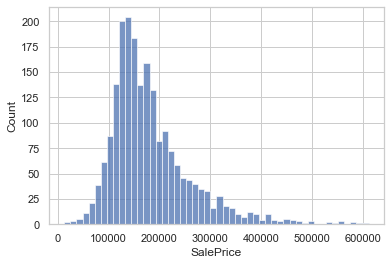

In [59]:
sns.histplot(data=dummy_train,x='SalePrice', bins=50);

In [60]:
#Linear Regression
lr = LinearRegression()

In [61]:
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
lr.score(X_train, y_train)

0.8771935301449971

In [63]:
lr.score(X_test,y_test)

0.8875778624009935

In [64]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-6.348629848968165e+23

In [65]:
lr_preds = lr.predict(X_test)

In [66]:
mean_absolute_error(y_test,lr_preds)

19307.13327641493

In [67]:
#RMSE
np.sqrt(mean_squared_error(y_test,lr_preds))

26659.81307475561

In [68]:
#RMSE
mean_squared_error(y_test,lr_preds)  ** 0.5

26659.81307475561

In [69]:
lr_residuals = y_test - lr_preds
#lr_residuals

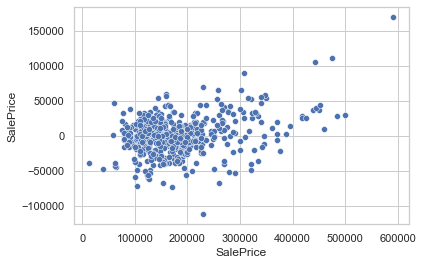

In [70]:
sns.scatterplot(x=y_test,y=lr_residuals);

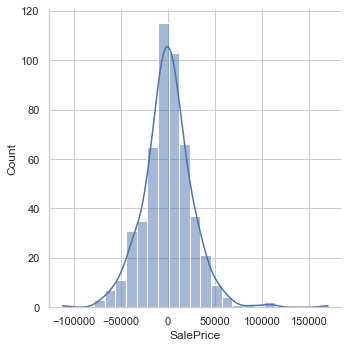

In [71]:
sns.displot(lr_residuals,bins=25,kde=True);

In [72]:
lasso_cv = LassoCV(n_alphas=200)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)

80.86291111056003


In [73]:
lasso = Lasso(alpha = lasso_cv.alpha_)

In [74]:
ridge_cv = RidgeCV(alphas = [0.1, 1, 10, 100])
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)

10.0


In [75]:
ridge = Ridge(alpha = ridge_cv.alpha_)

In [76]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-6.348629848968165e+23

In [77]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.8645632002682422

In [78]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.8643736404023417

In [79]:
lasso.fit(X_train, y_train)

Lasso(alpha=80.86291111056003)

In [80]:
lasso.score(X_train, y_train)

0.8767749891651748

In [81]:
lasso.score(X_test, y_test)

0.8875842772756012

In [82]:
lasso_scores.mean()

0.8645632002682422

In [83]:
lasso_preds = lasso.predict(X_test)

In [84]:
#rmse
mean_squared_error(y_test,lasso_preds)  ** 0.5

26659.05245144209

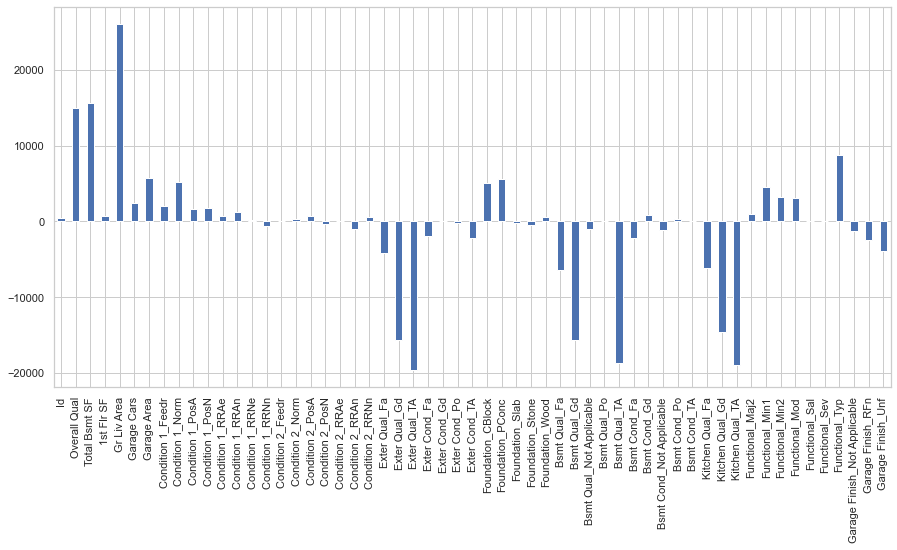

In [85]:
pd.Series(lasso.coef_, index=features).plot.bar(figsize=(15, 7));

In [86]:
df2 = pd.DataFrame({'feature': features,
                   'coef': lasso.coef_})

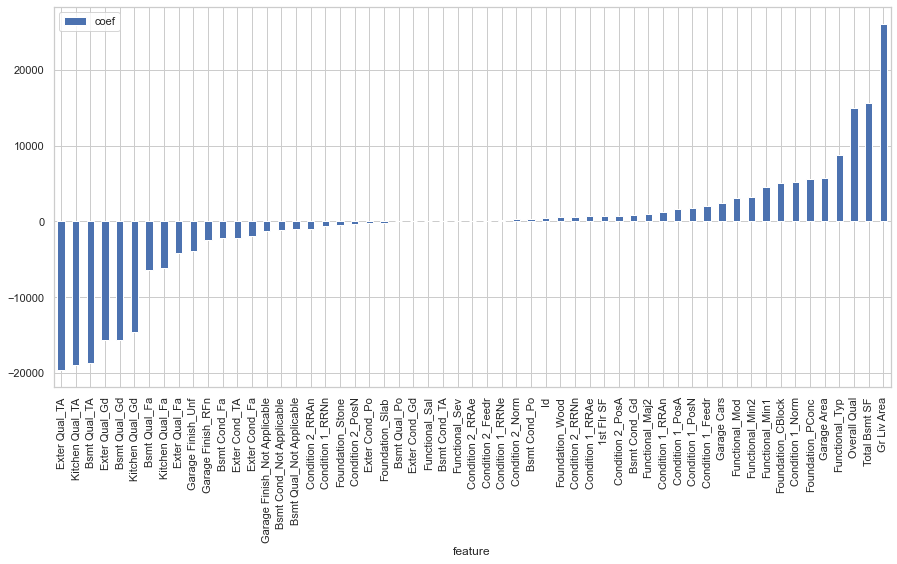

In [87]:
df2.sort_values(by='coef', ascending = True).plot(kind='bar', x='feature', figsize =(15, 7));

In [88]:
lasso_residuals = y_test - lasso_preds

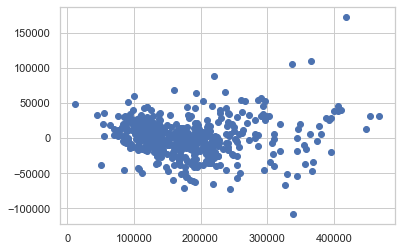

In [89]:
plt.scatter(lasso_preds, lasso_residuals);

In [90]:
ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [91]:
ridge.score(X_train, y_train)

0.8769959121150226

In [92]:
ridge.score(X_test, y_test)

0.8877541505121431

In [93]:
ridge_preds = ridge.predict(X_test)

In [94]:
#rmse
mean_squared_error(y_test,ridge_preds)  ** 0.5

26638.90237127541

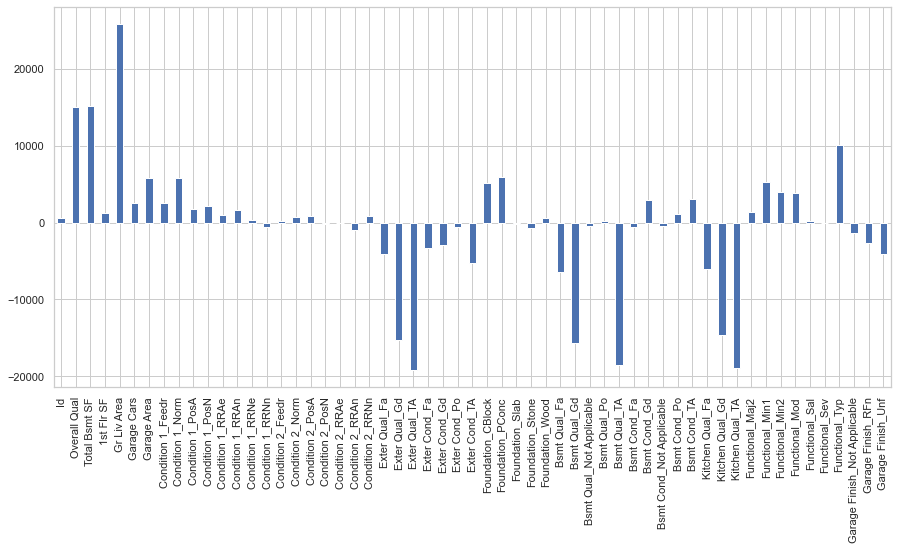

In [95]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7));

In [96]:
df3 = pd.DataFrame({'feature': features,
                   'coef': ridge.coef_})

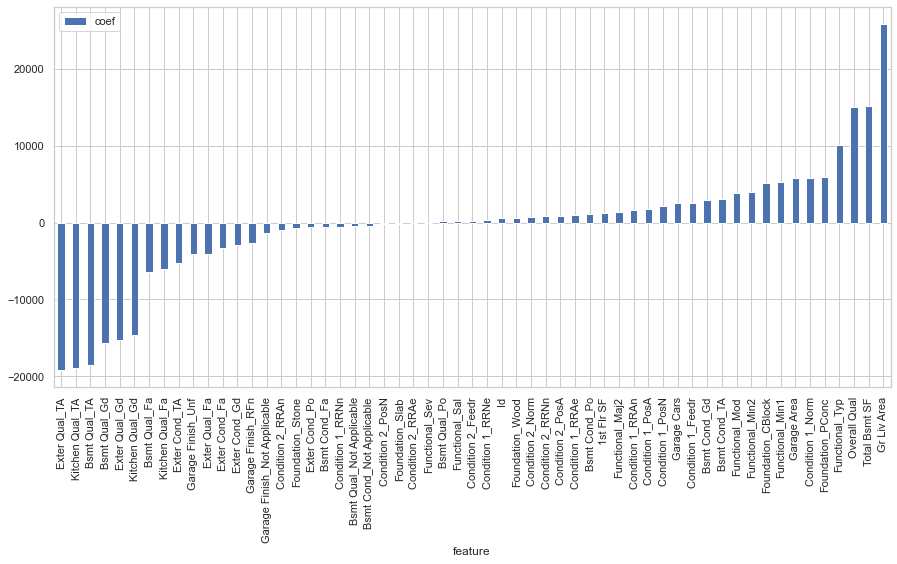

In [97]:
df3.sort_values(by='coef', ascending = True).plot(kind='bar', x='feature', figsize =(15, 7));

In [98]:
ridge_residuals = y_test - ridge_preds

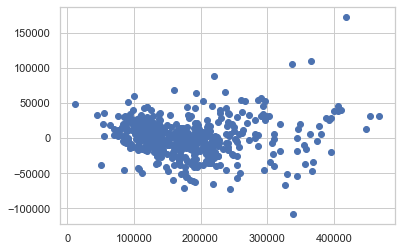

In [99]:
plt.scatter(lasso_preds, lasso_residuals);